# Weighted Histogram Analysis Method (WHAM) for free energy calculations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def flat(x_vals):
    return np.zeros_like(x_vals)

def w_shape(x_vals):
    return x_vals**4 - 0.85*x_vals**2

class Dynamics():
    def __init__(self, fes_func):
        self.x_vals = np.linspace(-1,1,2000)
        self.fes_func = fes_func
        self.underlying_fes = fes_func(self.x_vals)
        
        self.boltz_weights = np.exp(-self.underlying_fes)

        self.underlying_prob_dist = self.boltz_weights / np.sum(self.boltz_weights)

    def dynamics(self,nsteps):
        x_index = np.random.randint(0,len(self.x_vals))
        coord = self.x_vals[x_index]
        self.time = [0]
        self.trajectory = [coord]

        for i in range(nsteps):
            rand = np.random.rand()
            self.time.append(i+1)
            
            # These first two if statements sort of act as periodic boundary conditions.
            if (x_index + 1) == 2000:
                x_index = -1

            elif (x_index - 1) == -2001:
                x_index = 1999

            elif rand >= 0.5:
                trans_prob = self.boltz_weights[x_index + 1] / self.boltz_weights[x_index]
                if trans_prob >= np.random.rand():
                    x_index += 1

            else:
                trans_prob = self.boltz_weights[x_index - 1] / self.boltz_weights[x_index]
                if trans_prob >= np.random.rand():
                    x_index -= 1

            # I think this causes incorrect sampling somehow.
            coord = self.x_vals[x_index]
            
            self.trajectory.append(coord)      


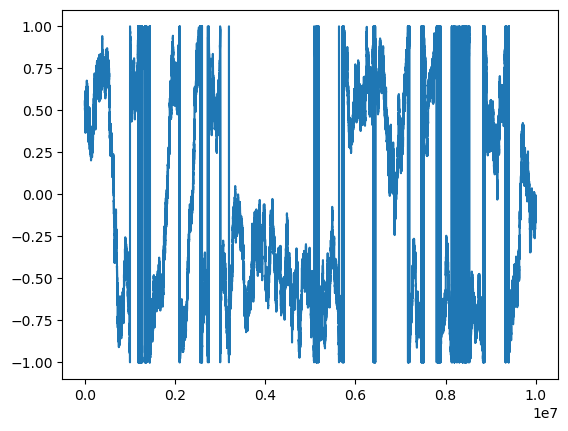

In [76]:
dyn = Dynamics(flat)
dyn.dynamics(10000000)

plt.plot(dyn.time,dyn.trajectory)


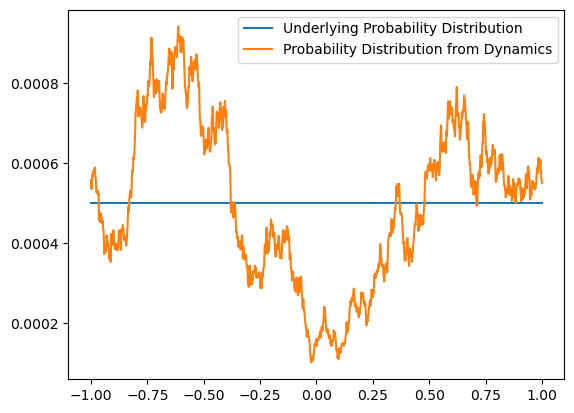

In [77]:
hist, _ = np.histogram(dyn.trajectory,bins=2000)

prob_hist = hist/hist.sum()

plt.plot(dyn.x_vals,dyn.underlying_prob_dist,label='Underlying Probability Distribution')
plt.plot(dyn.x_vals,prob_hist,label='Probability Distribution from Dynamics')
plt.legend()

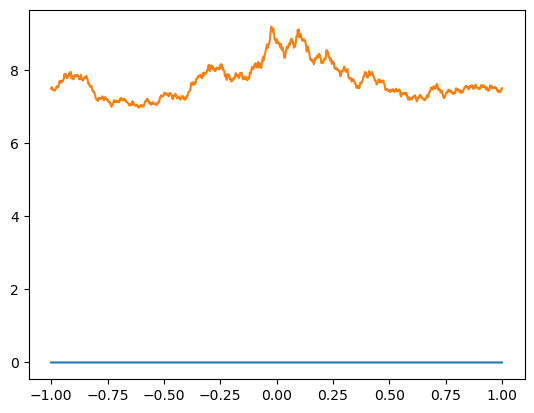

In [78]:
sampled_fes = -np.log(prob_hist)
plt.plot(dyn.x_vals,dyn.underlying_fes)
plt.plot(dyn.x_vals,sampled_fes)